# Capstone : IT Ticket Classification [SEPT SUN GRP 4B]

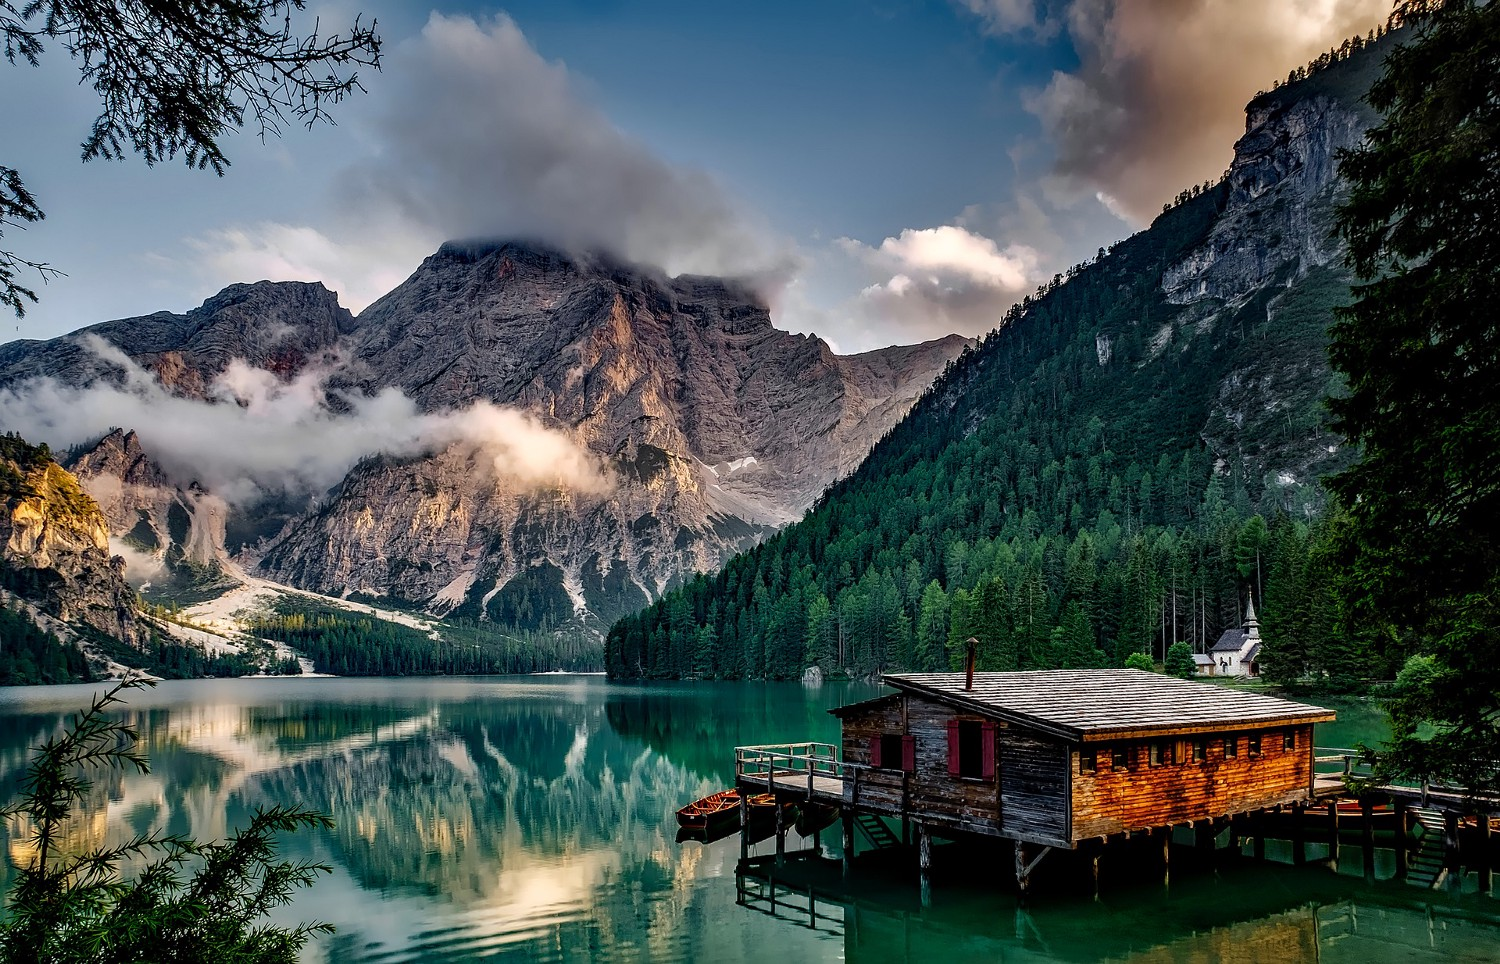

# Aim: Automatic Ticket Assignment [Part 1/6]


Build a classifier that can classify the tickets by analyzing text. Classify incidents to right functional groups can help organizations to reduce the resolving time of the issue and can focus on more productive tasks.

## There are total 6 parts in which the code has been divided.

## Part 1/6:  Pre-Processing, Data Visualization and EDA

- Exploring the given Data files
- Understanding the structure of data
- Missing points in data
- Finding inconsistencies in the data
- Visualizing different patterns
- Visualizing different text features
- Dealing with missing values
- Text preprocessing
- Creating word vocabulary from the corpus of report text data
- Creating tokens as required

# Import Libraries

In [2]:
import pandas as pd 
import numpy as np 
import re 
import sys
import seaborn as sns
import matplotlib.pyplot as plt
import random
import time

import warnings
import pandas.testing as tm
import spacy  
#import langid 
import nltk

import re, string
from wordcloud import WordCloud
from pprint import pprint

from sklearn.utils import resample
from sklearn import preprocessing

from nltk.corpus import stopwords
from nltk.classify.textcat import TextCat  
from dateutil import parser
from nltk.tokenize import word_tokenize
#from langdetect import detect
from textblob import TextBlob
#from googletrans import Translator

import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models.ldamodel import LdaModel
from gensim.models import CoherenceModel

import pyLDAvis
import pyLDAvis.gensim 

from sklearn.decomposition import LatentDirichletAllocation

from string import punctuation

#import enchant
#from enchant.checker import SpellChecker
    
from sklearn.feature_extraction.text import CountVectorizer
import plotly.express as px

from gensim.models import Word2Vec
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, Flatten, Bidirectional, GlobalMaxPool1D,GRU,Conv1D,MaxPooling1D
from tensorflow.keras.models import Model, Sequential
import tensorflow as tf
from sklearn import metrics
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

from scipy import spatial
from sklearn.manifold import TSNE

from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import MultinomialNB

import logging, warnings
from PIL import Image
from IPython.display import IFrame

##--------------------##

if sys.version_info >= (3, 3) :
    import collections.abc as collections_abc
else:
    import collections as collections_abc
    
from collections import Counter
from collections import OrderedDict
import operator

##-------------------##

plt.style.use('ggplot')
%matplotlib inline

#warnings.filterwarnings("ignore",category=DeprecationWarning)
#warnings.filterwarnings(action='once')
warnings.filterwarnings('ignore')
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

In [3]:
np.__version__ , pd.__version__,tf.__version__, print(sys.version_info)

sys.version_info(major=3, minor=7, micro=6, releaselevel='final', serial=0)


('1.16.1', '1.0.1', '2.0.0', None)

In [4]:
"""
Download required NLTK stopwords corpus if it has not already been downloaded.
Download required NLTK corpora if they have not already been downloaded.
Download the NLTK averaged perceptron tagger that is required for this algorithm to run only if the corpora has not already been downloaded.
Download Punkt Sentence Tokenizer. This tokenizer divides a text into a list of sentences, by using an unsupervised algorithm to build a model for abbreviation words, collocations, and words that start sentences
"""
nltk.download('wordnet', quiet=True)
nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)
nltk.download('averaged_perceptron_tagger', quiet=True) 

True

# Data Loading

In [5]:
"""
from google.colab import drive
drive.mount('/content/drive')

project_path = '/content/drive/My Drive/Colab Notebooks/'
file_name ='input_data.xlsx'

"""
project_path = 'C:/MyDrive/Drive2/PersonalDrive/MachineLearning/GreatLearning/CapstoneProject/Final-Deck/'
file_name ='input_data.xlsx'

In [7]:
data=pd.read_excel(project_path+file_name,encoding=sys.getfilesystemencoding()) 
data.head()

Short description  \
0                    login issue   
1                        outlook   
2             cant log in to vpn   
3  unable to access hr_tool page   
4                   skype error    

                                         Description             Caller  \
0  -verified user details.(employee# & manager na...  spxjnwir pjlcoqds   
1  \r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...  hmjdrvpb komuaywn   
2  \r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...  eylqgodm ybqkwiam   
3                      unable to access hr_tool page  xbkucsvz gcpydteq   
4                                       skype error   owlgqjme qhcozdfx   

  Assignment group  
0            GRP_0  
1            GRP_0  
2            GRP_0  
3            GRP_0  
4            GRP_0

In [8]:
data.shape #data.info() , #data[data.columns[0]]

(8500, 4)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Short description  8492 non-null   object
 1   Description        8499 non-null   object
 2   Caller             8500 non-null   object
 3   Assignment group   8500 non-null   object
dtypes: object(4)
memory usage: 265.8+ KB


In [10]:
data.describe()

Short description Description             Caller Assignment group
count               8492        8499               8500             8500
unique              7481        7817               2950               74
top       password reset         the  bpctwhsn kzqsbmtp            GRP_0
freq                  38          56                810             3976

Finding:
- Dataset has 8500 Documents(records) and 4 features(columns). 
- Dataset : Dataset Structure (4 Variables, 8500 Incident Records): Caller, Short Description, Description and Assignment Group 
- 8 Titles and 1 Description is null.

# Data Duplication (Description & Assignment Group Criterion)

In [11]:
data.shape

(8500, 4)

In [12]:
print("Duplicate Rows except first occurrence based on (1) all columns, (2) description, (3) description and group")
len(data[data.duplicated()]), len(data[data.duplicated([data.columns[1]])]), len(data[data.duplicated([data.columns[1], data.columns[3]])])


Duplicate Rows except first occurrence based on (1) all columns, (2) description, (3) description and group


(83, 682, 661)

In [13]:
ls=[len(data[data.duplicated()]), len(data[data.duplicated([data.columns[1]])]), len(data[data.duplicated([data.columns[1], data.columns[3]])])]
ls_ttle =["all columns","description", "description and group"]

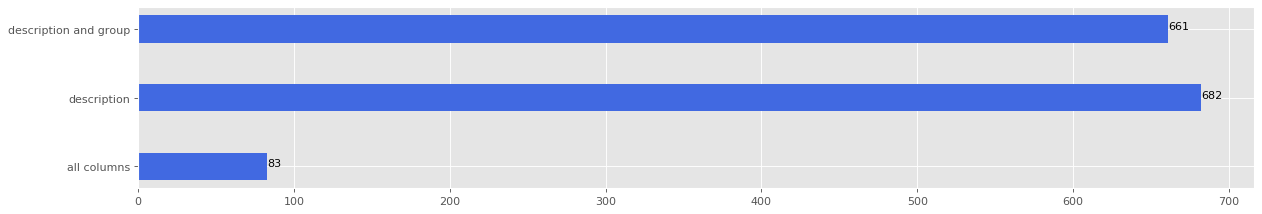

In [14]:
plt.figure(figsize=(18, 3), dpi=80)
plt.style.use('ggplot')
plt.barh(ls_ttle, ls, color ='royalblue' , height=0.4)
for index, value in enumerate(ls):
    plt.text(value, index, str(value))
plt.show()

Finding:

- Duplicate Rows except first occurrence based on:
- Description and Group: 661 
- Description: 682
- All columns: 83

In [15]:
data = data.drop_duplicates(subset=[data.columns[1], data.columns[3]], keep='first')

In [16]:
data.shape

(7839, 4)

#### Removing duplicated records based on Description and Group columns: After removing the duplicated records based on description and group column, total number of records are 7839.

# Missing & Modal Values

Analysing data for each column based on total number of records, unique values, null values, space value count, mode value count, non empty value count

In [17]:
for i in enumerate(data.columns):
    print(i[0], i[1],': Total Records :', data[i[1]].shape)
    print(i[0], i[1],': Unique Value Count :', data[i[1]].unique().shape)
    print(i[0], i[1],': Null Value Count :', data[i[1]].isna().sum())
    print(i[0], i[1],': Space Value Count :', (data[i[1]] == '').sum(axis=0))
    print(i[0], i[1],': Mode Value :', data[i[1]].mode()[0])
    print(i[0], i[1],': Mode Value Count :', data[i[1]].value_counts(ascending=True).max())
    #print(i[0], i[1],': Non-Empty Value Count : ', len(data.loc[data[i[1]].str.len() > 0].index))
    print(i[0], i[1],': Non-Empty Value Count : ', data[i[1]].notnull().sum() )
    print()
    print("-----------------------------------------------------------------------------------------------------")

0 Short description : Total Records : (7839,)
0 Short description : Unique Value Count : (7420,)
0 Short description : Null Value Count : 5
0 Short description : Space Value Count : 0
0 Short description : Mode Value : erp access issue
0 Short description : Mode Value Count : 17
0 Short description : Non-Empty Value Count :  7834

-----------------------------------------------------------------------------------------------------
1 Description : Total Records : (7839,)
1 Description : Unique Value Count : (7818,)
1 Description : Null Value Count : 1
1 Description : Space Value Count : 0
1 Description : Mode Value : account locked.
1 Description : Mode Value Count : 3
1 Description : Non-Empty Value Count :  7838

-----------------------------------------------------------------------------------------------------
2 Caller : Total Records : (7839,)
2 Caller : Unique Value Count : (2736,)
2 Caller : Null Value Count : 0
2 Caller : Space Value Count : 0
2 Caller : Mode Value : bpctwhsn k

In [18]:
print(data[data.columns[3]].value_counts().mean())
print()
print(data[data.columns[3]].value_counts(normalize=True))
print()
print(data[data.columns[3]].value_counts()[:10], data[data.columns[3]].value_counts()[:10].sum())
print()
print(data[data.columns[3]].value_counts()[-10:], data[data.columns[3]].value_counts()[-10:].sum())
print()
print(data[data.columns[3]].value_counts()[:50].sum(), data[data.columns[3]].value_counts()[-24:].sum(), data[data.columns[3]].value_counts()[:50].sum() + data[data.columns[3]].value_counts()[-24:].sum())
print()
print("-----------------------------------------------------------------------------------------------------")

105.93243243243244

GRP_0     0.435004
GRP_8     0.082281
GRP_24    0.036229
GRP_12    0.032657
GRP_9     0.032147
            ...   
GRP_64    0.000128
GRP_73    0.000128
GRP_61    0.000128
GRP_70    0.000128
GRP_67    0.000128
Name: Assignment group, Length: 74, dtype: float64

GRP_0     3410
GRP_8      645
GRP_24     284
GRP_12     256
GRP_9      252
GRP_2      240
GRP_19     214
GRP_3      200
GRP_6      183
GRP_13     145
Name: Assignment group, dtype: int64 5829

GRP_54    2
GRP_72    2
GRP_57    2
GRP_69    2
GRP_35    1
GRP_64    1
GRP_73    1
GRP_61    1
GRP_70    1
GRP_67    1
Name: Assignment group, dtype: int64 14

7762 77 7839

-----------------------------------------------------------------------------------------------------


In [84]:
iii=[]
for ii in range(0,len(data.columns),1):
    print(ii, 
          data.columns[ii], 
          #len(data.loc[data[data.columns[ii]].str.len() > 0].index),
          #len(data.loc[~(data[data.columns[ii]].str.len() > 0)].index)
          data[data.columns[ii]].notnull().sum(),
          data[data.columns[ii]].isna().sum()
          )
    for i in data.loc[data[data.columns[ii]].isna()].index:
        iii.append(i)
        print(i,data.loc[i][ii])
print("-----------------------------------------------------------------------------------------------------")
print(len(set(iii)))
print(iii)
print("-----------------------------------------------------------------------------------------------------")
print(': Describe Target Class :', data[data.columns[3]].value_counts(ascending=True).describe())

0 Short description 7839 0
1 Description 7839 0
2 Caller 7839 0
3 Assignment group 7839 0
4 New_Assignment_Groups 7839 0
5 Text_length 7839 0
-----------------------------------------------------------------------------------------------------
0
[]
-----------------------------------------------------------------------------------------------------
: Describe Target Class : count      74.000000
mean      105.932432
std       401.498301
min         1.000000
25%         5.250000
50%        25.500000
75%        81.000000
max      3410.000000
Name: Assignment group, dtype: float64


Notes:

- The detailed analysis of the data mode and missing values for each column are given above for each column based on Total Records, Unique Value Count, Null Value Count, Space Value Count, Mode Value, Mode Value Count and Non-Empty Value Count.
- Target class is also analyzed. There are 74 distinct labels. Please refer more details from above. 
- Missing Values & Duplicates : We have dropped duplicate records as they don’t provide additional information or value for classification. We have replaced the null values with a space. There were 83 duplicate records across all columns, 682 duplicate records by the value in Description column and 661 duplicate records having same values in Description and Assignment Group together. This basically means there were 27 incidents which were same but were assigned to different assignment group. After removing duplicate records we had a dataset reduced from 8500 to 7839. There were 5 incidents without any short description and 1 incident without a description.  We converted these null values into spaces. 

#### Replacing null valueswith spaces for description and short description

In [85]:
data[data.columns[0]].fillna(value=' ', inplace=True)

In [86]:
data[data.columns[1]].fillna(value=' ', inplace=True)

#### Analysing the incident frequency by all assignment groups, above mean count and below mean count values

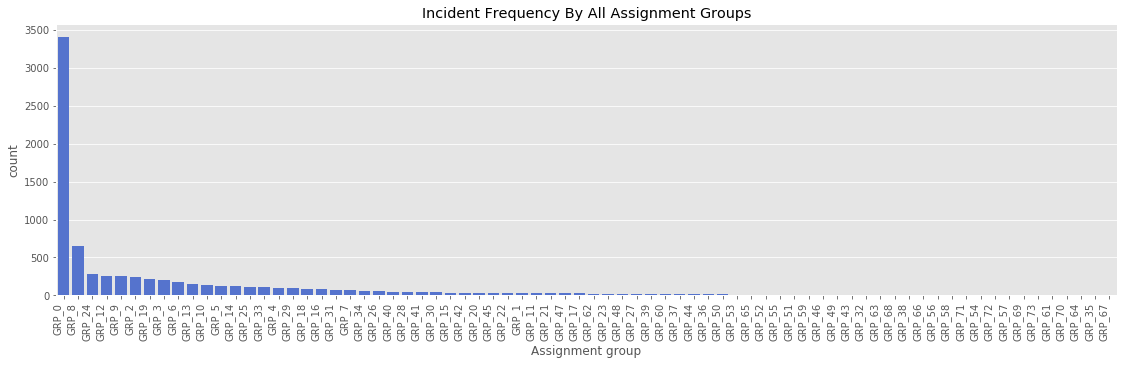

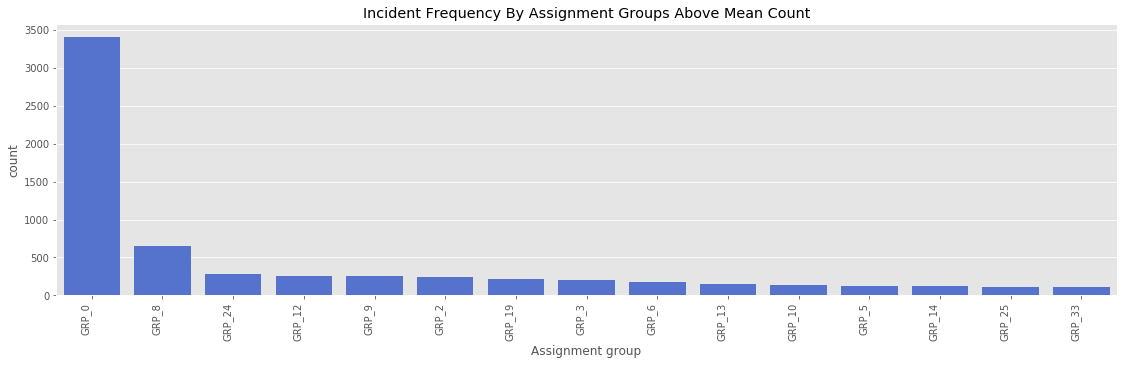

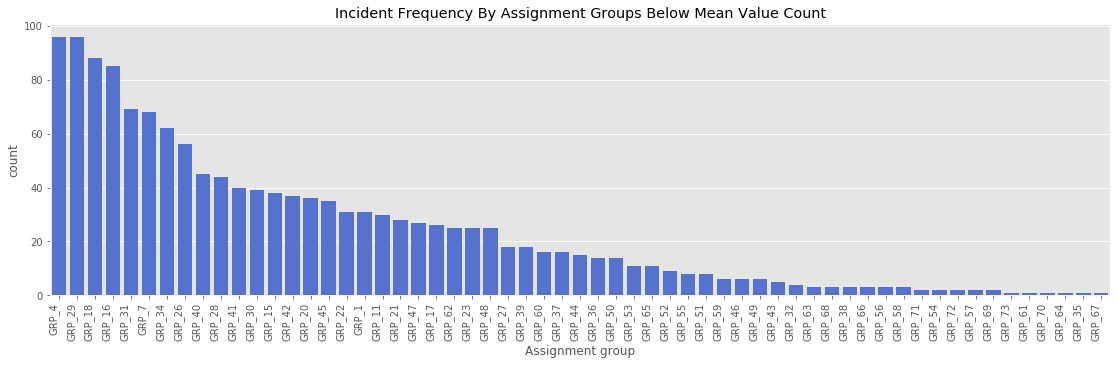

In [87]:
a_a_grp=data[data.columns[3]].value_counts().sort_values(ascending=False).index
#a_m_a_grp 

a_m_a_grp=[]
b_m_a_grp=[]

for i in a_a_grp :
    if (data[data[data.columns[3]]==i].count()[0] ) >= data[data.columns[3]].value_counts().mean():
        a_m_a_grp.append(i)
    else :
        b_m_a_grp.append(i)

c_a_grp=[a_a_grp,a_m_a_grp,b_m_a_grp] #print (len (a_a_grp),len(a_m_a_grp),len(b_m_a_grp))
c_a_grp_ttle=["Incident Frequency By All Assignment Groups", 
              "Incident Frequency By Assignment Groups Above Mean Count", 
              "Incident Frequency By Assignment Groups Below Mean Value Count"]

ii=0

while ii<3 :
    plt.subplots(figsize=(19,5))
    ax=sns.countplot(x=data.columns[3], 
                 data=data, 
                 orient="v",
                 color='royalblue',
                 order=c_a_grp[ii])
    ax.set_xticklabels(ax.get_xticklabels(), 
                       rotation=90, 
                       ha="right")
    ax.set_title(c_a_grp_ttle[ii])
    plt.show()
    ii=ii+1

In [88]:
len(data[data.columns[3]].unique())

74

#### There are 74 unique classes. Checking frequncy of each class.

In [89]:
data[data.columns[3]].value_counts()

GRP_0     3410
GRP_8      645
GRP_24     284
GRP_12     256
GRP_9      252
          ... 
GRP_64       1
GRP_73       1
GRP_61       1
GRP_70       1
GRP_67       1
Name: Assignment group, Length: 74, dtype: int64

#### There are few groups where class frequency is very less. Data seems to be highly unbalanced.

In [90]:
_DF=data.groupby([data.columns[3]]).size()
_DF

Assignment group
GRP_0     3410
GRP_1       31
GRP_10     140
GRP_11      30
GRP_12     256
          ... 
GRP_71       2
GRP_72       2
GRP_73       1
GRP_8      645
GRP_9      252
Length: 74, dtype: int64

Notes :  
- Imbalanced classes: The label data provided in the target class is imbalanced and skewed. Most of the tickets (3976, almost 50%) are being assigned to a single group (GRP_0). There are many classes that hardly have 1 datapoint. We might need to upsample the under represented classes. We have 74 categories. There are few categories with very few tickets. The detailed analysis is given above.

# New Column (New Assignment Group)

In [91]:
data.shape, print(data.columns[3])

Assignment group


((7839, 6), None)

In [92]:
data.head(2).T

0  \
Short description                                            login issue   
Description            login issue verified user details employee and...   
Caller                                                 spxjnwir pjlcoqds   
Assignment group                                                   GRP_0   
New_Assignment_Groups                                              GRP_0   
Text_length                                                          206   

                                                                       1  
Short description                                                outlook  
Description            outlook hello team my meetings skype meetings ...  
Caller                                                 hmjdrvpb komuaywn  
Assignment group                                                   GRP_0  
New_Assignment_Groups                                              GRP_0  
Text_length                                                          194

In [93]:
m_i_cnt=0 #Minimum Incidents Crieria For To Be An Independent Class Else Aggregate
s_a_grps=[]
for i in data[data.columns[3]].unique():
    if(data.groupby(data.columns[3])[data.columns[3]].value_counts()[i][0]<m_i_cnt):
        s_a_grps.append(i)

In [94]:
len(s_a_grps),s_a_grps

(0, [])

In [95]:
print('Groups Having Number of Incident Frequency less than threshold criteri of {} incidents per group'.format(m_i_cnt))
if len(s_a_grps) >0:
    plt.subplots(figsize=(19,5))
    ax=sns.countplot(x=data[ data[data.columns[3]].isin( s_a_grps )].columns[3], 
                 data=data[ data[data.columns[3]].isin( s_a_grps ) ], 
                 color='royalblue',
                 order= data[ data[data.columns[3]].isin( s_a_grps ) ][data[ data[data.columns[3]].isin( s_a_grps ) ].columns[3]].value_counts().sort_values(ascending=False).index
                )
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center")
    ax.set_title('Assignment Groups Less Than Threshold Incident Value')
    plt.show()

Groups Having Number of Incident Frequency less than threshold criteri of 0 incidents per group


In [96]:
print('Regrouping {} assignment groups under a new group which have incident frequency under minimum count of {}'.format(len(s_a_grps), m_i_cnt))

Regrouping 0 assignment groups under a new group which have incident frequency under minimum count of 0


In [97]:
data['New_Assignment_Groups'] = data[data.columns[3]]

In [98]:
data[data.columns[4]] = data[data.columns[4]].apply(lambda x : 'GRP_M_I_CNT' if x in s_a_grps else x)

In [99]:
data.head()

Short description  \
0                    login issue   
1                        outlook   
2             cant log in to vpn   
3  unable to access hr_tool page   
4                   skype error    

                                         Description             Caller  \
0  login issue verified user details employee and...  spxjnwir pjlcoqds   
1  outlook hello team my meetings skype meetings ...  hmjdrvpb komuaywn   
2    cant log in to vpn hi cannot log on to vpn best  eylqgodm ybqkwiam   
3  unable to access hr tool page unable to access...  xbkucsvz gcpydteq   
4                            skype error skype error  owlgqjme qhcozdfx   

  Assignment group New_Assignment_Groups  Text_length  
0            GRP_0                 GRP_0          206  
1            GRP_0                 GRP_0          194  
2            GRP_0                 GRP_0           87  
3            GRP_0                 GRP_0           29  
4            GRP_0                 GRP_0           12

In [100]:
len(data.groupby(data.columns[3])[data.columns[3]].unique()), len(data.groupby(data.columns[4])[data.columns[4]].unique())

(74, 74)

In [101]:
data.shape

(7839, 6)

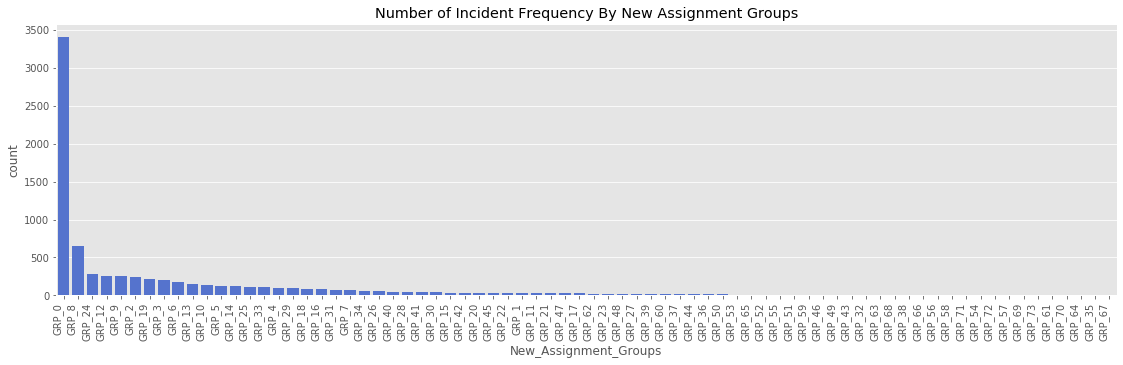

In [102]:
#data[data.columns[4]].unique(), len(data[data.columns[4]].unique()), #data.head()
#print(data[data.columns[4]].value_counts().sort_values(ascending=False).index)
plt.subplots(figsize=(19,5))
ax=sns.countplot(x=data.columns[4], data=data, color='royalblue',order=data[data.columns[4]].value_counts().sort_values(ascending=False).index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
ax.set_title('Number of Incident Frequency By New Assignment Groups')
plt.show()

# New Column (Text Length)

Creating a new column for words count for further analysis

In [103]:
data.head(2).T

0  \
Short description                                            login issue   
Description            login issue verified user details employee and...   
Caller                                                 spxjnwir pjlcoqds   
Assignment group                                                   GRP_0   
New_Assignment_Groups                                              GRP_0   
Text_length                                                          206   

                                                                       1  
Short description                                                outlook  
Description            outlook hello team my meetings skype meetings ...  
Caller                                                 hmjdrvpb komuaywn  
Assignment group                                                   GRP_0  
New_Assignment_Groups                                              GRP_0  
Text_length                                                          194

In [104]:
data['Text_length']=[len(text) for text in data[data.columns[1]]]
data.head(2).T

0  \
Short description                                            login issue   
Description            login issue verified user details employee and...   
Caller                                                 spxjnwir pjlcoqds   
Assignment group                                                   GRP_0   
New_Assignment_Groups                                              GRP_0   
Text_length                                                          204   

                                                                       1  
Short description                                                outlook  
Description            outlook hello team my meetings skype meetings ...  
Caller                                                 hmjdrvpb komuaywn  
Assignment group                                                   GRP_0  
New_Assignment_Groups                                              GRP_0  
Text_length                                                          142

In [105]:
data.shape

(7839, 6)

In [106]:
data[data.columns[5]].describe()

count    7839.000000
mean      190.779053
std       327.417672
min         0.000000
25%        69.000000
50%       111.000000
75%       203.000000
max      6256.000000
Name: Text_length, dtype: float64

# Data Adequacy (Threshold Text Length Criterion)

In [107]:
data.shape

(7839, 6)

In [108]:
min_t_cnt=0
mask_1= data[data.columns[5]] <= min_t_cnt #mask_1 for less than or same as min text length
mask_2= data[data.columns[5]] > min_t_cnt #mask_2 for above min text length
data.shape[0],len(data[mask_1]), len(data[mask_2])

(7839, 34, 7805)

In [109]:
data.head(2).T

0  \
Short description                                            login issue   
Description            login issue verified user details employee and...   
Caller                                                 spxjnwir pjlcoqds   
Assignment group                                                   GRP_0   
New_Assignment_Groups                                              GRP_0   
Text_length                                                          204   

                                                                       1  
Short description                                                outlook  
Description            outlook hello team my meetings skype meetings ...  
Caller                                                 hmjdrvpb komuaywn  
Assignment group                                                   GRP_0  
New_Assignment_Groups                                              GRP_0  
Text_length                                                          142

In [110]:
data=data[mask_2]

In [111]:
data.shape

(7805, 6)

In [112]:
data[data.columns[1]]=data[data.columns[1]].apply(lambda x : " ".join([text for text in x.split() if(len(text) > min_t_cnt-1)]))
data.shape

(7805, 6)

In [113]:
data.shape, len(data[data[data.columns[5]] > min_t_cnt]), len(data[data[data.columns[5]] <= min_t_cnt])

((7805, 6), 7805, 0)

Length of Texts By Incidents Across Assignment Groups


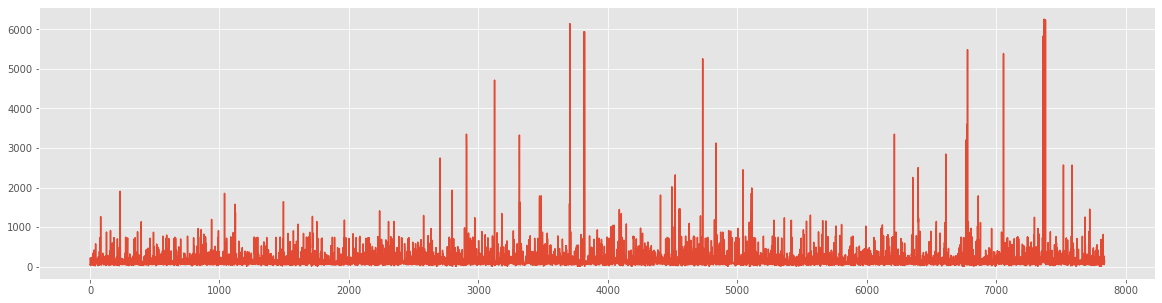

In [114]:
print('Length of Texts By Incidents Across Assignment Groups')
plt.subplots(figsize=(20,5))
ax=plt.plot(data[data.columns[5]])
plt.show()

In [115]:
data.head(2).T

0  \
Short description                                            login issue   
Description            login issue verified user details employee and...   
Caller                                                 spxjnwir pjlcoqds   
Assignment group                                                   GRP_0   
New_Assignment_Groups                                              GRP_0   
Text_length                                                          204   

                                                                       1  
Short description                                                outlook  
Description            outlook hello team my meetings skype meetings ...  
Caller                                                 hmjdrvpb komuaywn  
Assignment group                                                   GRP_0  
New_Assignment_Groups                                              GRP_0  
Text_length                                                          142

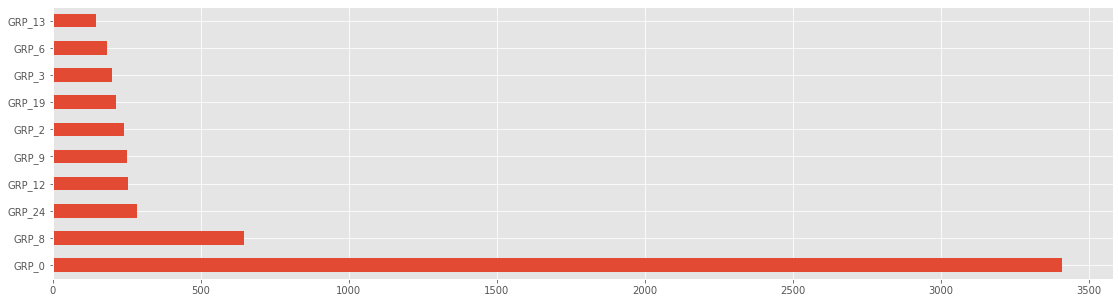

In [116]:
#data[data.columns[4]].value_counts()[:45]
data[data.columns[4]].value_counts(ascending=False, sort=True)[:10].plot(kind='barh' , figsize=(19, 5), rot=0) # top 10 assignment groups

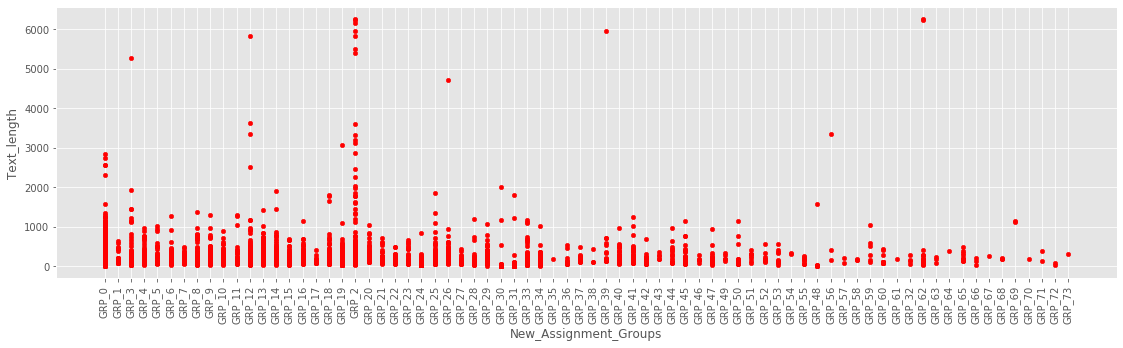

In [117]:
data.plot(x=data.columns[4],y=data.columns[5],kind='scatter',color='r', figsize=(19, 5), rot=90)

# Combining Short Description and Description

In [118]:
data[data.columns[1]].str.strip().str.lower()

0       login issue verified user details employee and...
1       outlook hello team my meetings skype meetings ...
2         cant log in to vpn hi cannot log on to vpn best
3       unable to access hr tool page unable to access...
4                                 skype error skype error
                              ...                        
7834    emails not coming in from zz mail good afterno...
7835    telephony software issue telephony software issue
7836    vip windows password reset for tifpdchb pedxru...
7837    machine o est funcionando am unable to access ...
7838    an mehreren pc lassen sich verschiedene prgram...
Name: Description, Length: 7805, dtype: object

In [119]:
data.reset_index(drop=True,inplace=True)

In [120]:
"""
# data[data.columns[1]] = data[data.columns[1]].str.strip()
# data[data.columns[1]] = data[data.columns[1]].str.lower()
# data[data.columns[1]] = data[data.columns[1]].str.split().apply(lambda x:OrderedDict.fromkeys(x).keys()).str.join(' ')
# data.info()
#Merge the Short description and Description columns
#data['Description'] = data[['Short description', 'Description']].apply(lambda x: ' '.join(x), axis = 1)
#data['Description']= data["Short description"].astype(str) +" "+ data["Description"].astype(str)
"""

data['Description'] = data['Short description'].str.cat(data['Description'], sep=' ', na_rep=' ')

Notes: Concatenated the two description columns (Short description and description into description).The description column is analysed as given above. This takes care of using the addtional feature information (even though limited) to be considered for vectorisation and classification. Many of the short descriptions have texts that exists in the description field however these are like keywords or titles and can be valuable for classification and topic modeling.


In [121]:
data.head(2).T

0  \
Short description                                            login issue   
Description            login issue login issue verified user details ...   
Caller                                                 spxjnwir pjlcoqds   
Assignment group                                                   GRP_0   
New_Assignment_Groups                                              GRP_0   
Text_length                                                          204   

                                                                       1  
Short description                                                outlook  
Description            outlook outlook hello team my meetings skype m...  
Caller                                                 hmjdrvpb komuaywn  
Assignment group                                                   GRP_0  
New_Assignment_Groups                                              GRP_0  
Text_length                                                          142

In [122]:
data.iloc[7349]

Short description        abend batch job in job_scheduler :bkbackup_too...
Description              abend batch job in job_scheduler :bkbackup_too...
Caller                                                   oldrctiu bxurpsyi
Assignment group                                                     GRP_5
New_Assignment_Groups                                                GRP_5
Text_length                                                            105
Name: 7349, dtype: object

Length of Texts By Incidents Across Assignment Groups


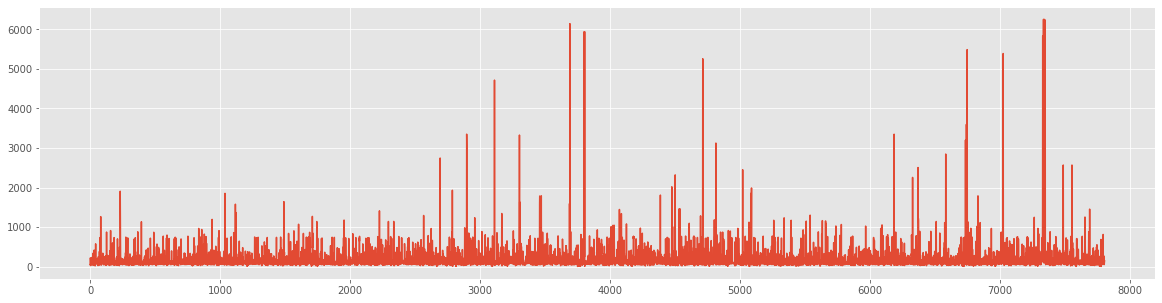

In [123]:
print('Length of Texts By Incidents Across Assignment Groups')
plt.subplots(figsize=(20,5))
ax=plt.plot(data[data.columns[5]])
plt.show()

# Cleaning Data

    Description are predominantly in English with words from other European languages as well. We plan to keep the data unmodified as received from the source. However for the sake of learning and experimentation, we plan to detect the languages and try to convert certain words into English.

    Descriptions are unstructured akin to reviews, chats, e-mails or tweets and its not clean. There are for instance special characters, emails, dates, symbols, hyper links, URL, IP Addresses and missing values or excessive whitespaces and stop words. We plan to remove the stop words and unnecessary noise through regular expression before vectorization of the feature data. 

    We planned to use information in the Short Description along with the information in the Description column by concatenation of the data. Descriptions in some cases are though same as the data in the Short Description.
    
    Description contains conjugated words i.e. they are not properly separated and the text is submitted without prior spell corrections (spelling errors) including the fact that there are descriptions that contain sentences which are not grammatically obvious or otherwise meaningful to be analyzed through human intervention.


In [124]:
data_bkp=data.copy()

In [125]:
data_bkp.shape, data.shape

((7805, 6), (7805, 6))

In [126]:
data.head(2).T

0  \
Short description                                            login issue   
Description            login issue login issue verified user details ...   
Caller                                                 spxjnwir pjlcoqds   
Assignment group                                                   GRP_0   
New_Assignment_Groups                                              GRP_0   
Text_length                                                          204   

                                                                       1  
Short description                                                outlook  
Description            outlook outlook hello team my meetings skype m...  
Caller                                                 hmjdrvpb komuaywn  
Assignment group                                                   GRP_0  
New_Assignment_Groups                                              GRP_0  
Text_length                                                          142

In [127]:
data.shape

(7805, 6)

Important: The data in description column (now concatenated with short description column) is text cleaned using the below regular expression method and criteria. we have managed most of the visible and obvious expressions for removing noise. We are also timing the function to understand the time it consumes for cleaning the texts. 

In [128]:
data.head(2).T

0  \
Short description                                            login issue   
Description            login issue login issue verified user details ...   
Caller                                                 spxjnwir pjlcoqds   
Assignment group                                                   GRP_0   
New_Assignment_Groups                                              GRP_0   
Text_length                                                          204   

                                                                       1  
Short description                                                outlook  
Description            outlook outlook hello team my meetings skype m...  
Caller                                                 hmjdrvpb komuaywn  
Assignment group                                                   GRP_0  
New_Assignment_Groups                                              GRP_0  
Text_length                                                          142

In [129]:
import re, string
s = "string. With. Punctuation?" # Sample string 
out = re.sub('[%s]' % re.escape(string.punctuation), ' ', s)
out

'string  With  Punctuation '

In [130]:
data[data.columns[1]][0]

'login issue login issue verified user details employee and manager name checked the user name in ad and reset the password advised the user to login and check caller confirmed that he was able to login issue resolved'

In [131]:
out = re.sub('[%s]' % re.escape(string.punctuation), ' ',data[data.columns[1]][0])
out

'login issue login issue verified user details employee and manager name checked the user name in ad and reset the password advised the user to login and check caller confirmed that he was able to login issue resolved'

In [132]:
idx = random.randrange(0,data.shape[0],5)
idx, data[data.columns[1]][idx] #1935

(3435,
 'loop back ip for primary router at erkheim went unreachable loop back ip for primary router at erkheim went unreachable loop back ip for primary router at erkheim went unreachable')

In [133]:
data[data.columns[1]][0]

'login issue login issue verified user details employee and manager name checked the user name in ad and reset the password advised the user to login and check caller confirmed that he was able to login issue resolved'

In [134]:
test='1234, er,123232,44,,13sad32333,    &asd@&asdsd  @1234 , kana@we.commm \
@... 1rr, 5Re, 6 RR, 6-7, 8_9yy login pwd password \
psswod pssword, @com (Ddddsds(ASd)ad) login verify \
asdasd \
232132\
asdasds %%! '

pattern1 = '(\\d|\\W)+'
pattern2 = '\d+'
pattern3 = '[^a-zA-Z1-9]+'
pattern4 = '_'
pattern5 = ["pwd", "psswords", "psswod", "pssword"] 
pattern6 = ' +'
pattern7 = '@[^\s]+'
pattern8 = '\n'
pattern9 =  '\&\w*'

test1 = re.sub(pattern9,' ' ,test)
#test2 = re.sub(pattern1,' ' ,test)
#test3 = ' '.join(['password' if word in pattern5 else word for word in test.split()]) 

test

'1234, er,123232,44,,13sad32333,    &asd@&asdsd  @1234 , kana@we.commm @... 1rr, 5Re, 6 RR, 6-7, 8_9yy login pwd password psswod pssword, @com (Ddddsds(ASd)ad) login verify asdasd 232132asdasds %%! '

In [135]:
test1

'1234, er,123232,44,,13sad32333,     @   @1234 , kana@we.commm @... 1rr, 5Re, 6 RR, 6-7, 8_9yy login pwd password psswod pssword, @com (Ddddsds(ASd)ad) login verify asdasd 232132asdasds %%! '

In [136]:
"""
get the caller names from the column and remove these names from the description where the match is found.
for callers in data[data.columns[2]]:
    print(callers)
    callerslist = [name for name in callers.split()]
    for anynamepart in callerslist: 
          print(anynamepart)
            #text = text.replace(anynamepart,'')
callerslist
"""

"\nget the caller names from the column and remove these names from the description where the match is found.\nfor callers in data[data.columns[2]]:\n    print(callers)\n    callerslist = [name for name in callers.split()]\n    for anynamepart in callerslist: \n          print(anynamepart)\n            #text = text.replace(anynamepart,'')\ncallerslist\n"

In [137]:
def is_valid_date(date_str):
    try:
        parser.parse(date_str)
        return True
    except:
        return False

In [138]:
def clean_data(text):
    text = text.lower()
    #text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
    text = ' '.join([w for w in text.split() if not is_valid_date(w)])
    text = re.sub(r"received from:",' ',text)
    text = re.sub(r"from:",' ',text)
    text = re.sub(r"to:",' ',text)
    text = re.sub(r"subject:",' ',text)
    text = re.sub(r"sent:",' ',text)
    text = re.sub(r"ic:",' ',text)
    text = re.sub(r"cc:",' ',text)
    text = re.sub(r"bcc:",' ',text)
    text = re.sub(r'\S*@\S*\s?', '', text)#Remove email 
    text = re.sub(r'\d+','' ,text) # \d is the same as [0-9] single digit & \d+ means all sequential digits i.e. removes digits
    text = re.sub(r'\n',' ',text) # Remove new line characters 
    text = re.sub(r'\t',' ',text) 
    text = re.sub(r'#','', text)  # Remove hashtag while keeping hashtag text
    text = re.sub(r'&;?', 'and',text)  #& 
    text = re.sub(r'https?:\/\/.*\/\w*', '', text)   # Remove hyperlinks
    #text = re.sub('((www\.[^\s]+)|(https?://[^\s]+))','URL', text)
    text= ''.join(c for c in text if c <= '\uFFFF') # Remove characters beyond Readable formart by Unicode:
    text = text.strip() # Remove unreadable characters  (also extra spaces)
    text = ' '.join(re.sub("[^\u4e00-\u9fa5\u0030-\u0039\u0041-\u005a\u0061-\u007a]", " ", text).split())
    for callers in data[data.columns[2]]:   # get all the caller names from the column and remove these names from the description wherever a match is found.
        callerslist = [name for name in callers.split()]
        for anynamepart in callerslist: 
            text = text.replace(anynamepart,'')
    text = re.sub(r"\s+[a-zA-Z]\s+", ' ', text)
    text = re.sub(' +', ' ', text)
    text = text.strip()
    return text

    #password_list = ["pwd", "psswords", "psswod", "pssword"] 
    #password = "password"
    #text = ' '.join([password if word in password_list else word for word in text.split()]) 
    
    #text = re.sub(r'\&\w*;', '', text) #removed the words after & sign in the text  # Remove HTML special entities (e.g. &amp;)
    #text = text.lower().replace("ё", "е")
    #text = re.sub(r"_", ' ', text) # replace underscore with a space
    #text = re.sub('[^a-zA-Z0-9]+' , ' ', text) # other than alphabets and digit i.e excludes spaces or commas or hyphens underscore
    #text = re.sub('[^a-zA-Z1-9]*' , ' ', text) # other than alphabets and digit i.e excludes spaces or commas or hyphens underscore
    #text = re.sub(' +',' ', text) #extra spaces with a single space
    #text = re.sub(r"\'", "",  text) # single quotes
    #text = re.sub("(\\d|\\W)+"," ",text) #removes numbers or digits 
    #text = re.sub('\s+', ' ', text)  # remove newline chars
    #text = re.sub(r'\S*@\S*\s?', '', text) 
    #text = ' '.join([item for item in text.split() if '@' not in item]) #for email removal

In [139]:
data=data_bkp.copy()
data.reset_index(drop=True,inplace=True)
data[data.columns[1]][0], data[data.columns[1]][7349], data[data.columns[1]][7349]

('login issue login issue verified user details employee and manager name checked the user name in ad and reset the password advised the user to login and check caller confirmed that he was able to login issue resolved',
 'abend batch job in job_scheduler :bkbackup_tool_HostName_770_prod_inc abend batch job in job scheduler bkbackup tool hostname prod inc job name bkbackup tool hostname prod inc',
 'abend batch job in job_scheduler :bkbackup_tool_HostName_770_prod_inc abend batch job in job scheduler bkbackup tool hostname prod inc job name bkbackup tool hostname prod inc')

In [140]:
data.head(2).T

0  \
Short description                                            login issue   
Description            login issue login issue verified user details ...   
Caller                                                 spxjnwir pjlcoqds   
Assignment group                                                   GRP_0   
New_Assignment_Groups                                              GRP_0   
Text_length                                                          204   

                                                                       1  
Short description                                                outlook  
Description            outlook outlook hello team my meetings skype m...  
Caller                                                 hmjdrvpb komuaywn  
Assignment group                                                   GRP_0  
New_Assignment_Groups                                              GRP_0  
Text_length                                                          142

In [141]:
start = time.time()
data[data.columns[1]]=data[data.columns[1]].apply(clean_data)
time.sleep(1)
end = time.time()
print(f"Time Taken To Clean Data : {end - start}")
data.shape

Time Taken To Clean Data : 97.91169333457947


(7805, 6)

In [142]:
data[data.columns[1]][0], data[data.columns[1]][7349], data[data.columns[1]][2828], data[data.columns[1]][1612]

('login issue login issue verified user details employee and manager name checked the user name in ad and reset the password advised the user to login and check caller confirmed that he was able to login issue resolved',
 'abend batch job in job scheduler bkbackup tool hostname prod inc abend batch job in job scheduler bkbackup tool hostname prod inc job name bkbackup tool hostname prod inc',
 'can you reset my password for sid can you reset my password for sid name language browser microsoft internet explorer customer number telephone summary can you reset my password for sid',
 'no power on the laptop no power on the laptop no power on the laptop')

In [143]:
data.head(2).T

0  \
Short description                                            login issue   
Description            login issue login issue verified user details ...   
Caller                                                 spxjnwir pjlcoqds   
Assignment group                                                   GRP_0   
New_Assignment_Groups                                              GRP_0   
Text_length                                                          204   

                                                                       1  
Short description                                                outlook  
Description            outlook outlook hello team my meetings skype m...  
Caller                                                 hmjdrvpb komuaywn  
Assignment group                                                   GRP_0  
New_Assignment_Groups                                              GRP_0  
Text_length                                                          142

In [144]:
data['Description'].notnull().sum()

7805

In [145]:
for i in enumerate(data.columns):
    print(i[0], i[1],': Total Records :', data[i[1]].shape)
    print(i[0], i[1],': Unique Value Count :', data[i[1]].unique().shape)
    print(i[0], i[1],': Null Value Count :', len(data[data[i[1]].isna()]))
    print(i[0], i[1],': Space Value Count :', (data[i[1]] == '').sum(axis=0))
    print(i[0], i[1],': Mode Value :', data[i[1]].mode()[0])
    print(i[0], i[1],': Mode Value Count :', data[i[1]].value_counts(ascending=True).max())
    print(i[0], i[1],': Non-Empty Value Count : ', data[i[1]].notnull().sum())
    print()
    print("-----------------------------------------------------------------------------------------------------")

print(data[data.columns[3]].value_counts().mean())
print()
print(data[data.columns[3]].value_counts(normalize=True))
print()
print(data[data.columns[3]].value_counts()[:10], data[data.columns[3]].value_counts()[:10].sum())
print()
print(data[data.columns[3]].value_counts()[-10:], data[data.columns[3]].value_counts()[-10:].sum())
print()
print(data[data.columns[3]].value_counts()[:50].sum(), data[data.columns[3]].value_counts()[-24:].sum(), data[data.columns[3]].value_counts()[:50].sum() + data[data.columns[3]].value_counts()[-24:].sum())
print()
print("-----------------------------------------------------------------------------------------------------")

0 Short description : Total Records : (7805,)
0 Short description : Unique Value Count : (7387,)
0 Short description : Null Value Count : 0
0 Short description : Space Value Count : 0
0 Short description : Mode Value : erp access issue
0 Short description : Mode Value Count : 17
0 Short description : Non-Empty Value Count :  7805

-----------------------------------------------------------------------------------------------------
1 Description : Total Records : (7805,)
1 Description : Unique Value Count : (6618,)
1 Description : Null Value Count : 0
1 Description : Space Value Count : 0
1 Description : Mode Value : job job failed in job scheduler at job job failed in job scheduler at job job failed in job scheduler at
1 Description : Mode Value Count : 444
1 Description : Non-Empty Value Count :  7805

-----------------------------------------------------------------------------------------------------
2 Caller : Total Records : (7805,)
2 Caller : Unique Value Count : (2714,)
2 Caller

In [146]:
iii=[]
for ii in range(0,len(data.columns),1):
    print(ii, 
          data.columns[ii], 
          data[data.columns[ii]].notnull().sum(),
          data[data.columns[ii]].isna().sum()
         )
    for i in data.loc[data[data.columns[ii]].isna()].index:
        iii.append(i)
        print(i,data.loc[i][ii])
print("-----------------------------------------------------------------------------------------------------")
print(len(set(iii)))
print(iii)
print("-----------------------------------------------------------------------------------------------------")
print(': Describe Target Class :', data[data.columns[3]].value_counts(ascending=True).describe())

0 Short description 7805 0
1 Description 7805 0
2 Caller 7805 0
3 Assignment group 7805 0
4 New_Assignment_Groups 7805 0
5 Text_length 7805 0
-----------------------------------------------------------------------------------------------------
0
[]
-----------------------------------------------------------------------------------------------------
: Describe Target Class : count      74.000000
mean      105.472973
std       401.589145
min         1.000000
25%         5.250000
50%        25.000000
75%        80.750000
max      3410.000000
Name: Assignment group, dtype: float64


In [147]:
data_bkp=data.copy()

#  Multi-Lingual Text & Language Translation (Optional)

In [148]:
non_en_txt = ['nicht', 'bitte']
non_en_txt_list = '|'.join(non_en_txt)
non_en_txt_list

'nicht|bitte'

In [149]:
non_en_txt_Index = data[data[data.columns[1]].str.contains(non_en_txt_list)].index 
print(non_en_txt_Index)
len(non_en_txt_Index), data[data.columns[1]].iloc[non_en_txt_Index[0]], #data[data.columns[1]][265]

Int64Index([ 244,  258,  263,  265,  324,  345,  351,  353,  356,  358,
            ...
            7279, 7296, 7405, 7433, 7435, 7553, 7730, 7734, 7748, 7804],
           dtype='int64', length=269)


(269,
 'reset the password for on mail reset the password for on mail bitte passwort mail zur cksetzen bitte neues passwort zu manager')

In [151]:
import googletrans
from googletrans import Translator
print(googletrans.LANGUAGES), len(googletrans.LANGUAGES)

{'af': 'afrikaans', 'sq': 'albanian', 'am': 'amharic', 'ar': 'arabic', 'hy': 'armenian', 'az': 'azerbaijani', 'eu': 'basque', 'be': 'belarusian', 'bn': 'bengali', 'bs': 'bosnian', 'bg': 'bulgarian', 'ca': 'catalan', 'ceb': 'cebuano', 'ny': 'chichewa', 'zh-cn': 'chinese (simplified)', 'zh-tw': 'chinese (traditional)', 'co': 'corsican', 'hr': 'croatian', 'cs': 'czech', 'da': 'danish', 'nl': 'dutch', 'en': 'english', 'eo': 'esperanto', 'et': 'estonian', 'tl': 'filipino', 'fi': 'finnish', 'fr': 'french', 'fy': 'frisian', 'gl': 'galician', 'ka': 'georgian', 'de': 'german', 'el': 'greek', 'gu': 'gujarati', 'ht': 'haitian creole', 'ha': 'hausa', 'haw': 'hawaiian', 'iw': 'hebrew', 'he': 'hebrew', 'hi': 'hindi', 'hmn': 'hmong', 'hu': 'hungarian', 'is': 'icelandic', 'ig': 'igbo', 'id': 'indonesian', 'ga': 'irish', 'it': 'italian', 'ja': 'japanese', 'jw': 'javanese', 'kn': 'kannada', 'kk': 'kazakh', 'km': 'khmer', 'ko': 'korean', 'ku': 'kurdish (kurmanji)', 'ky': 'kyrgyz', 'lo': 'lao', 'la': 'lat

(None, 107)

In [152]:
translator = Translator()
result = translator.translate(non_en_txt_list, dest='en')
result

In [153]:
print(result.src)
print(result.dest)
print(result.origin)
print(result.text)
print(result.pronunciation)

de
en
nicht|bitte
not | please
not | please


In [154]:
def text_translation(non_en_txt):
    translator =Translator()
    result = translator.translate(non_en_txt, dest='en')
    #print(result.origin, ' -> ', result.text)
    print(' Origin: ------------------------------------------------------------------------', "\n") 
    print(result.origin, "\n")
    print(' Translated: ---------------------------------------------------------------------', "\n") 
    print(result.text, "\n")
    print(' **********************************************************************************', "\n") 
    return result.text
#https://www.codeproject.com/Tips/1236705/How-to-Use-Google-Translator-in-Python

In [155]:
text_translation(non_en_txt_list)

 Origin: ------------------------------------------------------------------------ 

nicht|bitte 

 Translated: --------------------------------------------------------------------- 

not | please 

 ********************************************************************************** 



'not | please'

In [156]:
data.iloc[0:3,[1]]

Description
0  login issue login issue verified user details ...
1  outlook outlook hello team my meetings skype m...
2  cant log in to vpn cant log in to vpn hi canno...

In [157]:
data[data.columns[1]][4]

'skype error skype error skype error'

In [158]:
len(data[data.columns[1]].isnull()) , data.shape[0]

(7805, 7805)

In [159]:
print(translator.detect(data[data.columns[1]][4]).lang)

enes


In [160]:
translations = translator.translate(data[data.columns[1]][4], dest='en')

In [161]:
print(translations.origin, ' ----------> ', translations.text) 

skype error skype error skype error  ---------->  skype error skype error skype error


In [162]:
data.shape[0]

7805

In [163]:
start = time.time()
non_en_txt_Index=[]
translator =Translator()
frac = 10 #data.shape[0]
for i in range(0,30*frac,1):
    if data[data.columns[1]][i] == None or data[data.columns[1]][i] =="": 
        pass
    else: 
        if (translator.detect(data[data.columns[1]][i]).lang) !='en': 
            non_en_txt_Index.append(i)
end = time.time()
print(len(non_en_txt_Index))
print(f"Time Taken To Identify Non-English Text : {end - start}")

10
Time Taken To Identify Non-English Text : 49.45737814903259


In [164]:
for i in range(0, len(non_en_txt_Index), 1):
    print(i)
    print(data[data.columns[1]][non_en_txt_Index[i]])
    print()

0
skype error skype error skype error

1
mobile device activation mobile device activation pm nwfodmhc exurcwkm se ha bloqueado en forma temporal la sincronizaci de su dispositivo vil mediante exchange activesync hasta que su administrador autorice el acceso hi received this message and our local it expert has told me to open ticket

2
probleme mit bluescreen probleme mit bluescreen hallo es ist erneut passiert der pc hat sich zum wiederholten male aufgeh ngt und mir lediglich einen blauen bildschirm mit weisser schrift pr sentiert was nnen wir da machen

3
reset the password for on mail reset the password for on mail bitte passwort mail zur cksetzen bitte neues passwort zu manager

4
probleme mit laufwerk probleme mit laufwerk probleme mit laufwerk

5
netweaver funktioniert nicht mehr netweaver funktioniert nicht mehr hallo netweaver funktioniert nicht mehr bzw kann ich nicht mehr ffnen mit freundlichen gr en best

6
neues passwort r accountname tgryhu hgygrtui neues passwort accountn

In [165]:
text_translation(data[data.columns[1]][non_en_txt_Index[0]])

 Origin: ------------------------------------------------------------------------ 

skype error skype error skype error 

 Translated: --------------------------------------------------------------------- 

skype error skype error skype error 

 ********************************************************************************** 



'skype error skype error skype error'

In [166]:
for i in range(0, len(non_en_txt_Index), 1):
    #print(data[data.columns[1]][non_en_txt_Index[i]])
    text_translation(data[data.columns[1]][non_en_txt_Index[i]])

 Origin: ------------------------------------------------------------------------ 

skype error skype error skype error 

 Translated: --------------------------------------------------------------------- 

skype error skype error skype error 

 ********************************************************************************** 

 Origin: ------------------------------------------------------------------------ 

mobile device activation mobile device activation pm nwfodmhc exurcwkm se ha bloqueado en forma temporal la sincronizaci de su dispositivo vil mediante exchange activesync hasta que su administrador autorice el acceso hi received this message and our local it expert has told me to open ticket 

 Translated: --------------------------------------------------------------------- 

mobile device activation mobile device activation pm nwfodmhc exurcwkm has been temporarily blocked from syncing your vile device through exchange activesync until your administrator authorizes access hi 

In [167]:
start = time.time()
for i in non_en_txt_Index:
    data[data.columns[1]][i] = text_translation(data[data.columns[1]][i])
time.sleep(1)
end = time.time()
print(f"Time Taken To Translate Non-English Text : {end - start}")

 Origin: ------------------------------------------------------------------------ 

skype error skype error skype error 

 Translated: --------------------------------------------------------------------- 

skype error skype error skype error 

 ********************************************************************************** 

 Origin: ------------------------------------------------------------------------ 

mobile device activation mobile device activation pm nwfodmhc exurcwkm se ha bloqueado en forma temporal la sincronizaci de su dispositivo vil mediante exchange activesync hasta que su administrador autorice el acceso hi received this message and our local it expert has told me to open ticket 

 Translated: --------------------------------------------------------------------- 

mobile device activation mobile device activation pm nwfodmhc exurcwkm has been temporarily blocked from syncing your vile device through exchange activesync until your administrator authorizes access hi 

In [168]:
"""
start = time.time()
non_en_txt_Index=[]
translator =Translator()
for i in range(0,data.shape[0],1):
    if len(data[data.columns[1]][i])>0 :
        if (translator.detect(data[data.columns[1]][i]).lang) !='en':
            non_en_txt_Index.append(i)
            data[data.columns[1]][i] = text_translation(data[data.columns[1]][i])
end = time.time()
print(len(non_en_txt_Index))
print(f"Time Taken To Identify and Translate Non-English Text : {end - start}")
"""

len(non_en_txt_Index), data[data.columns[1]].iloc[non_en_txt_Index[0]]

(10, 'skype error skype error skype error')

In [169]:
data.reset_index(drop=True,inplace=True)

"""
data[data.columns[1]] = data[data.columns[1]].str.strip()
data[data.columns[1]] = data[data.columns[1]].str.lower()
data[data.columns[1]] = data[data.columns[1]].str.split().apply(lambda x:OrderedDict.fromkeys(x).keys()).str.join(' ')
"""
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7805 entries, 0 to 7804
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Short description      7805 non-null   object
 1   Description            7805 non-null   object
 2   Caller                 7805 non-null   object
 3   Assignment group       7805 non-null   object
 4   New_Assignment_Groups  7805 non-null   object
 5   Text_length            7805 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 366.0+ KB


In [170]:
data.to_csv("itsupportdatacleaned.csv")

Note: Ideally the best way is to create word token and pass each token through the land detection test. If the token is detected as non-English it should be stored in the dictionary with index value as a key along with its english translation and with another status key as true or false (or 0 or 1) depending upon the translated word is different or same as the original text. If its different, it means those words or tokens were translated and if they are same, it means translation failed in so many langauges as an option and hence such words can be extracted and reviewed and moved to regex as a list to be removed. Also the dictionary of foreign language words as a list could be passed to then language translation. these can be used as substitution lists in regex or cleaning function. This operation could take time but that is the beauty of data wrangling activities which are done in a batch and which takes time but then subsequently it improves interpretability of data and speed of model execution and accuracy. Actually list of words is not a good strategy. It does not create meaningful sentences. In fact the gibberish words should be removed and differnt words or translations should be pushed back as a cleaned data.

Spelling errors will get eliminated through translation. even if they are there, it should be done before lemmatization as lemmas could get caught as a spelling error. Hence word tokens which are translated to be checked for the spelling error if not translated and they pass the spell check we can include else try correcting spelling errors and if corrected then accept them and if not corrected - take it as a noise into regex pipeline.

In fact the best way is to first use machine learning for translation into one base language say English. And then tokenize these texts or sentences and check which one are still not considered as English text. Analyze those texts. And then prepare regex for substitutions and after substition rerun the  cleaning part on the translated values. This will improve the quality of the data.

Also specify the base language for translation as it will be quicker else it has to search the vocabulary across many language if the origin is not specified. If here are two more prominent languages, then specify them perhaps one by one and execute it.

Multiple Languages and Spelling Errors : 

Note: We have kept the text as it is. However for experimentation and learning perspective we have tried to translate some of the words from non-English to English. We have also tried correcting some of the typical spelling errors. We have then used lemmatization on the processed or clean text. Lemmatization was carried out subsequently before tokenization for vectorization using word embeddings. We limited ourselves to use lemmatization instead of stemming based on the quality of the data to avoid further dilution of the input feeds. Spacy was used for lemmatization. PyLDAvis was used to plot the topics and analyze the texts using N-Gram models for clustering relevant data using Gensim. This section will stay as an ongoing improvement zone of activity for the team till the end of the project.


# Spell Check & Correction (Optional)

In [171]:
data.head(2).T

0  \
Short description                                            login issue   
Description            login issue login issue verified user details ...   
Caller                                                 spxjnwir pjlcoqds   
Assignment group                                                   GRP_0   
New_Assignment_Groups                                              GRP_0   
Text_length                                                          204   

                                                                       1  
Short description                                                outlook  
Description            outlook outlook hello team my meetings skype m...  
Caller                                                 hmjdrvpb komuaywn  
Assignment group                                                   GRP_0  
New_Assignment_Groups                                              GRP_0  
Text_length                                                          142

In [172]:
data[data.columns[1]].values[1]

'outlook outlook hello team my meetings skype meetings etc are not appearing in my outlook calendar can somebody please advise how to correct this kind'

In [173]:
word_tokens= [word_tokenize(art) for art in data[data.columns[1]].values]
word_tokens[0]

['login',
 'issue',
 'login',
 'issue',
 'verified',
 'user',
 'details',
 'employee',
 'and',
 'manager',
 'name',
 'checked',
 'the',
 'user',
 'name',
 'in',
 'ad',
 'and',
 'reset',
 'the',
 'password',
 'advised',
 'the',
 'user',
 'to',
 'login',
 'and',
 'check',
 'caller',
 'confirmed',
 'that',
 'he',
 'was',
 'able',
 'to',
 'login',
 'issue',
 'resolved']

In [174]:
non_eng_txt_lst=[]
#non_eng_txt_indx_lst=[]
frac = 50 #data.shape[0]
for row in range (0, frac,1):
    for i in range (0, len(word_tokens[row]), 1):
        if word_tokens[row][i] == None or word_tokens[row][i] =="": 
            pass
        else: 
            if (translator.detect(word_tokens[row][i]).lang) !='en': 
                non_eng_txt_lst.append(word_tokens[row][i])
len(non_eng_txt_lst)

22

In [175]:
non_eng_txt_lst # these are non-English tokens in the first few records which were scanned.

['com',
 'erpdata',
 'com',
 'erpdata',
 'com',
 'erpdata',
 'srpsad',
 'srpsad',
 'inplant',
 'inplant',
 'inplant',
 'sgxqsuojr',
 'xwbesorf',
 'sgxqsuojr',
 'xwbesorf',
 'sgxqsuojr',
 'xwbesorf',
 'inplant',
 'inplant',
 'inplant',
 'prtjc',
 'inplant']

In [176]:
"""
len(word_tokens), len(word_tokens[0]), word_tokens[0][0]
doc = data[data.columns[1]].values[0]
count_vec = CountVectorizer()
count_occurs = count_vec.fit_transform([doc])
count_occur_df = pd.DataFrame(
        (count, word) for word, count in zip(count_occurs.toarray().tolist()[0], count_vec.get_feature_names()))
count_occur_df.columns = ['Word', 'Count']
count_occur_df.sort_values('Count', ascending=False, inplace=True)
count_occur_df.head()
a_a_grp=data[data.columns[3]].value_counts().sort_values(ascending=False).index

len(data[data.columns[1]]), len(data[data.columns[1]][0])

max_error_count = 4
min_text_length = 3

def is_in_english(text):  
    d = SpellChecker("en_US")
    d.set_text(text)
    errors = [err.word for err in d]
    return False if ((len(errors) > max_error_count) or len(text.split()) < min_text_length) else True

data[data.columns[1]][0]

print(is_in_english(data[data.columns[1]][0]))

non_eng=[]



for i in range(0,len(data[data.columns[1]]),1): 
    #print (i)
    if (len(data[data.columns[1]][i])> 0) and is_in_english(data[data.columns[1]][i])==False: 
        non_eng.append(i)
print(len(non_eng))

data[data.columns[1]][non_eng[34]]

"""

'\nlen(word_tokens), len(word_tokens[0]), word_tokens[0][0]\ndoc = data[data.columns[1]].values[0]\ncount_vec = CountVectorizer()\ncount_occurs = count_vec.fit_transform([doc])\ncount_occur_df = pd.DataFrame(\n        (count, word) for word, count in zip(count_occurs.toarray().tolist()[0], count_vec.get_feature_names()))\ncount_occur_df.columns = [\'Word\', \'Count\']\ncount_occur_df.sort_values(\'Count\', ascending=False, inplace=True)\ncount_occur_df.head()\na_a_grp=data[data.columns[3]].value_counts().sort_values(ascending=False).index\n\nlen(data[data.columns[1]]), len(data[data.columns[1]][0])\n\nmax_error_count = 4\nmin_text_length = 3\n\ndef is_in_english(text):  \n    d = SpellChecker("en_US")\n    d.set_text(text)\n    errors = [err.word for err in d]\n    return False if ((len(errors) > max_error_count) or len(text.split()) < min_text_length) else True\n\ndata[data.columns[1]][0]\n\nprint(is_in_english(data[data.columns[1]][0]))\n\nnon_eng=[]\n\n\n\nfor i in range(0,len(data[

# Stopwords & Lemmatisation

In [177]:
data.head(2).T

0  \
Short description                                            login issue   
Description            login issue login issue verified user details ...   
Caller                                                 spxjnwir pjlcoqds   
Assignment group                                                   GRP_0   
New_Assignment_Groups                                              GRP_0   
Text_length                                                          204   

                                                                       1  
Short description                                                outlook  
Description            outlook outlook hello team my meetings skype m...  
Caller                                                 hmjdrvpb komuaywn  
Assignment group                                                   GRP_0  
New_Assignment_Groups                                              GRP_0  
Text_length                                                          142

In [178]:
idx= random.randint(0,data.shape[0]) #6758, 5716
print(idx, data[data.columns[1]][idx])

6206 password problem password problem hello my password is locked when log in company network have to sign in


In [179]:
# from nltk.corpus import stopwords
stop_words = stopwords.words('english') # NLTK Stop words
#stop_words.extend(['from', 'subject', 'com', 're', 'edu', 'received', 'use', 'not', 'would', 'say', 'could', '_', 'be', 'know', 'good', 'go', 'get', 'do', 'done', 'try', 'many', 'some', 'nice', 'thank', 'think', 'see', 'rather', 'easy', 'easily', 'lot', 'lack', 'make', 'want', 'seem', 'run', 'need', 'even', 'right', 'line', 'even', 'also', 'may', 'take', 'come'])

In [180]:
start = time.time()
for i,text in enumerate(data[data.columns[1]]):
    data[data.columns[1]][i]=" ".join(w for w in text.split(' ') if w not in stop_words)
time.sleep(1)
end = time.time()

print(f"Time Taken To Remove Stop Words From Data : {end - start}")

Time Taken To Remove Stop Words From Data : 5.479421854019165


In [182]:
nlp = spacy.load('en', disable=['parser', 'ner'])
allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']


def lemmatize_text(text):
    doc = nlp(text)
    return ' '.join([token.lemma_ for token in doc])


start = time.time()
data[data.columns[1]] = data[data.columns[1]].apply(lemmatize_text)
time.sleep(1)
end = time.time()
print(f"Time Taken To Lemmatise Data : {end - start}")

data.shape

Time Taken To Lemmatise Data : 29.28423523902893


(7805, 6)

In [183]:
data_bkp=data.copy()

In [187]:
data.to_csv(project_path+"itsupportdatacleaned.csv" , index=False)
#data.to_excel("itsupportdatacleaned.xlsx" , index=False)

In [188]:
data.head(2).T

0  \
Short description                                            login issue   
Description            login issue login issue verify user detail emp...   
Caller                                                 spxjnwir pjlcoqds   
Assignment group                                                   GRP_0   
New_Assignment_Groups                                              GRP_0   
Text_length                                                          204   

                                                                       1  
Short description                                                outlook  
Description            outlook outlook hello team meeting skype meeti...  
Caller                                                 hmjdrvpb komuaywn  
Assignment group                                                   GRP_0  
New_Assignment_Groups                                              GRP_0  
Text_length                                                          142

In [189]:
def get_corpus(text):
    words = []
    for i in text:
        for j in i.split():
            words.append(j.strip())
    return words

In [190]:
corpus = get_corpus(data[data.columns[1]].astype(str))
corpus[:15]

['login',
 'issue',
 'login',
 'issue',
 'verify',
 'user',
 'detail',
 'employee',
 'manager',
 'name',
 'check',
 'user',
 'name',
 'ad',
 'reset']

In [191]:
counter = Counter(corpus)
most_common = counter.most_common(10)
most_common = dict(most_common)
most_common

{'job': 7455,
 'scheduler': 2827,
 'password': 2776,
 'erp': 2604,
 'fail': 2442,
 'please': 2403,
 'tool': 2363,
 'na': 2077,
 'yes': 2027,
 'issue': 1964}

## Summary

Dataset : Dataset Structure (4 Variables, 8500 Incident Records): Caller, Short Description, Description and Assignment Group

Data Features: Caller (2950 unique count), Short Description, Description
Label/Target Class: Assignment Group (74)

Features

Caller names are ad-hoc and without proper references to any master data. It is not advised to be used as a feature as it will amount to overfitting the data. We expect these user or call names to be anything in the current scope of themes as making a prediction or classification of a ticket based on the caller names is not justifiable rationally. We plan to consider Short Description, Description as the data for feature engineering and ignore Caller related information in the dataset.
Description are predominantly in English with words from other European languages as well. We plan to keep the data unmodified as received from the source. However for the sake of learning and experimentation, we plan to detect the languages and try to convert certain words into English.
Descriptions are unstructured akin to reviews, chats, e-mails or tweets and its not clean. There are for instance special characters, emails, dates, symbols, hyper links, URL, IP Addresses and missing values or excessive whitespaces and stop words. We plan to remove the stop words and unnecessary noise through regular expression before vectorization of the feature data. 
We planned to use information in the Short Description along with the information in the Description column by concatenation of the data. Descriptions in some cases are though same as the data in the Short Description.
Description contains conjugated words i.e. they are not properly separated and the text is submitted without prior spell corrections (spelling errors) including the fact that there are descriptions that contain sentences which are not grammatically obvious or otherwise meaningful to be analyzed through human intervention.

Labels/Target Class

The label data provided in the target class is imbalanced and skewed. Most of the tickets (3976, almost 50%) are being assigned to a single group (GRP_0). There are also assignment groups which have been assigned only a single ticket in the given dataset. 

Part 2/6 will do further Exploratory Data Analysis using Topic Modelling and visualization techniques. 